In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Let's Import the dataframe and manipulate it so that we can plot graph on top of it

In [23]:
def change_dtype(x):
    try:
        return float(x)
    except:
        try:
            return float(x.strip())
        except:
            return None
def create_dataframe(df):
    rows=[]
    for row in df["ir_level;red_level;temperature"].str.split(";"):
        rows.append(row)
    columns=df.columns[0].split(";")
    df=pd.DataFrame(rows,columns=columns)
    for col in df.columns:
        df[col]=df[col].apply(lambda x:change_dtype(x))
    return df

In [24]:
def plot_ir_red(df):
   plt.figure(figsize=(8,5))
   plt.plot(df["ir_level"],color="purple",label="ir_level")
   plt.plot(df["red_level"],color="green",label="red_level")
   plt.xlabel("Timestamp",fontsize=15)
   plt.title("Ir and Red level Plot")
   plt.legend()

In [25]:
def plot_temp(df):
    plt.figure(figsize=(8,5))
    plt.plot(df["temperature"],color="y")
    plt.title("Temperature Plot")
    plt.show()
    

In [26]:
df1=pd.read_csv("alper.csv")
df1=create_dataframe(df1)

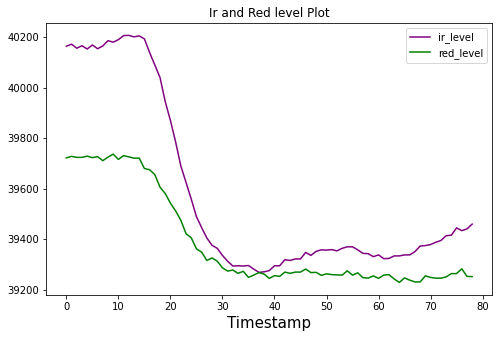

In [27]:
plot_ir_red(df1)

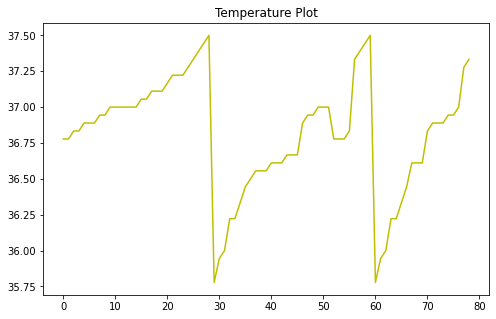

In [28]:
plot_temp(df1)

In [29]:
### Similarly for all datasets

In [30]:
df2=pd.read_csv("nilufer.csv")
df2=create_dataframe(df2)

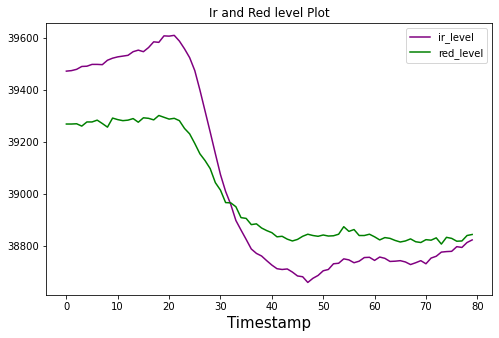

In [31]:
plot_ir_red(df2)

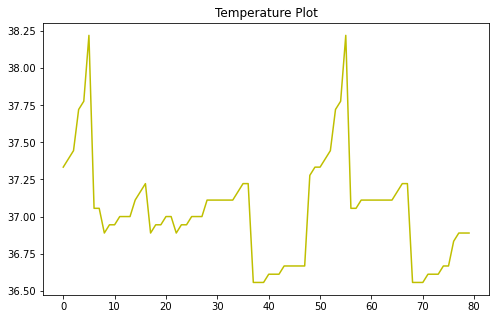

In [32]:
plot_temp(df2)

In [33]:
df3=pd.read_csv("person1.csv")
df3=create_dataframe(df3)

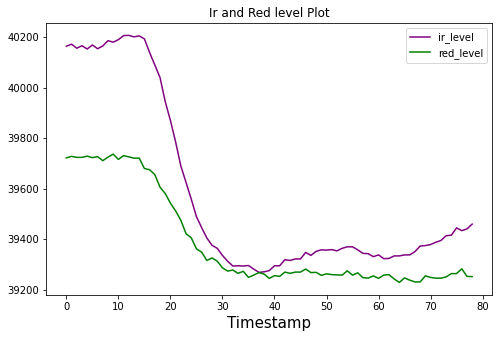

In [34]:
plot_ir_red(df3)

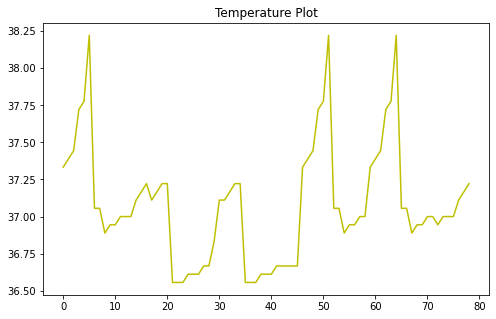

In [35]:
plot_temp(df3)

In [36]:
df4=pd.read_csv("person2.csv")
df4=create_dataframe(df4)

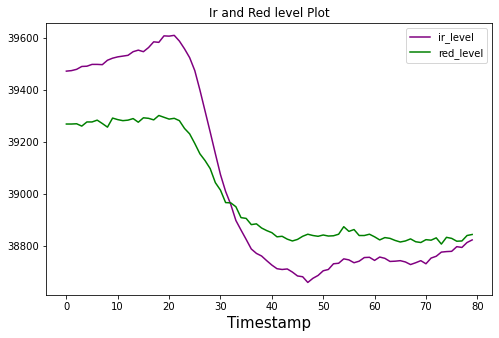

In [38]:
plot_ir_red(df4)

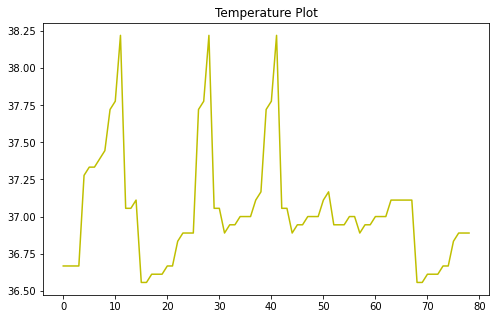

In [40]:
plot_temp(df4)

In [41]:
df5=pd.read_csv("person3.csv")
df5=create_dataframe(df5)

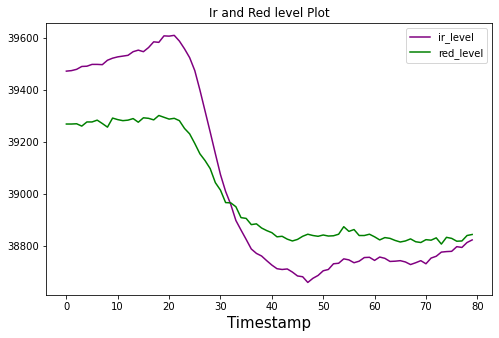

In [42]:
plot_ir_red(df5)

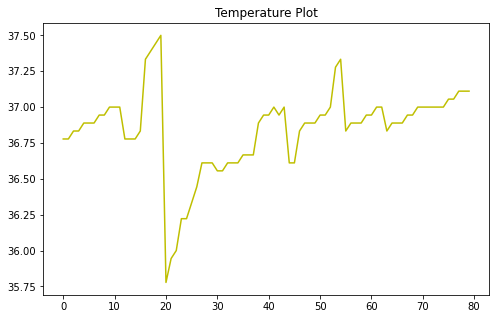

In [43]:
plot_temp(df5)

In [44]:
df6=pd.read_csv("person4.csv")
df6=create_dataframe(df6)
df7=pd.read_csv("person5.csv")
df7=create_dataframe(df7)
df8=pd.read_csv("person6.csv")
df8=create_dataframe(df8)
df9=pd.read_csv("person7.csv")
df9=create_dataframe(df9)
df10=pd.read_csv("person8.csv")
df10=create_dataframe(df10)
df11=pd.read_csv("person9.csv")
df11=create_dataframe(df11)
df12=pd.read_csv("person10.csv")
df12=create_dataframe(df12)

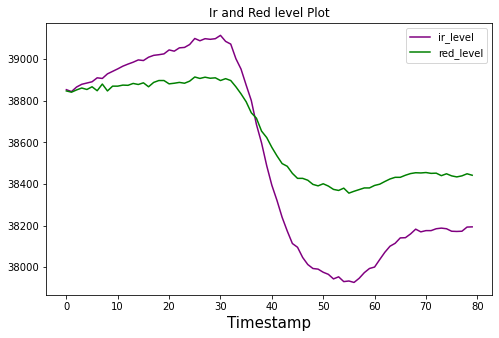

In [45]:
plot_ir_red(df6)

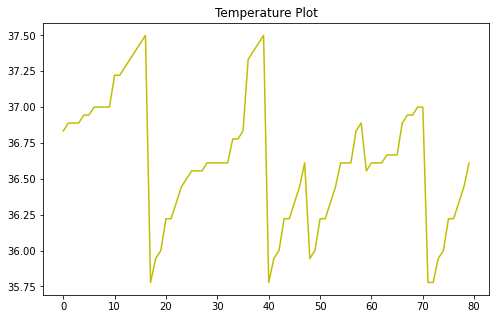

In [46]:
plot_temp(df6)

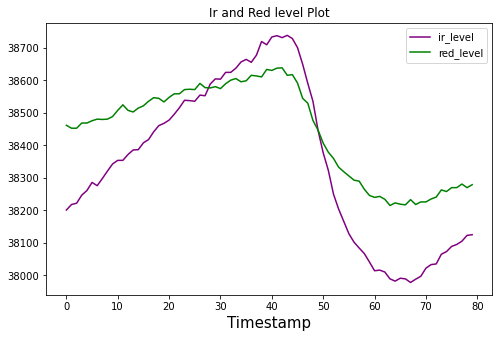

In [47]:
plot_ir_red(df7)

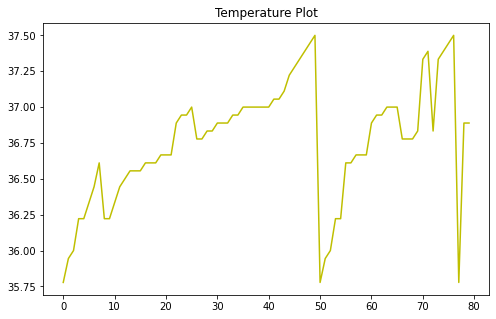

In [48]:
plot_temp(df7)

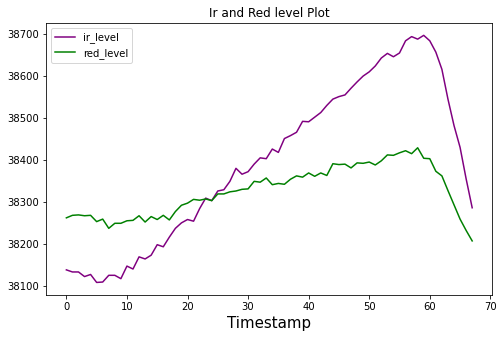

In [50]:
plot_ir_red(df8)

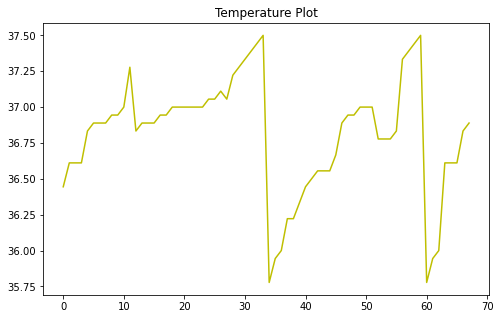

In [51]:
plot_temp(df8)

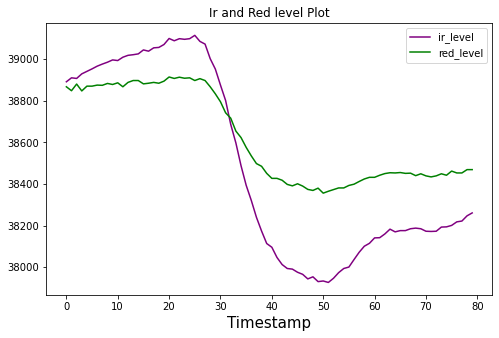

In [52]:
plot_ir_red(df9)

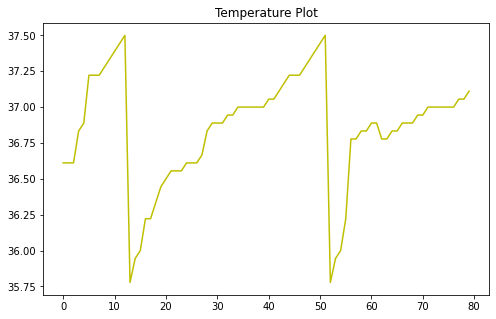

In [53]:
plot_temp(df9)

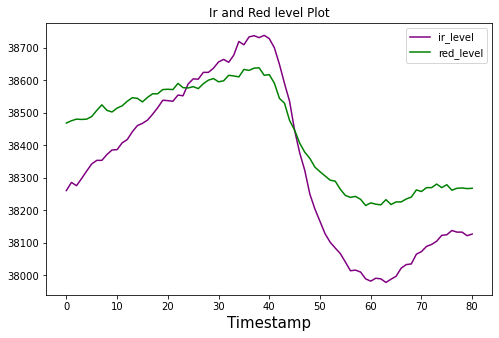

In [54]:
plot_ir_red(df10)

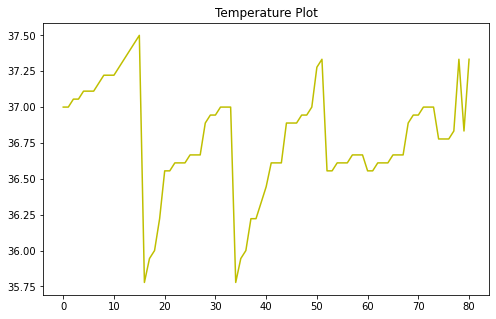

In [55]:
plot_temp(df10)

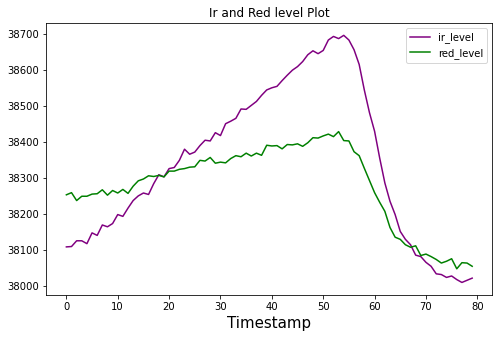

In [56]:
plot_ir_red(df11)

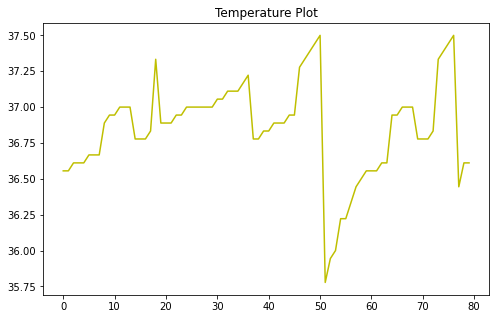

In [57]:
plot_temp(df11)

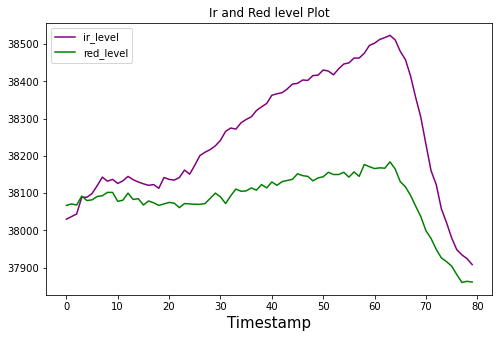

In [58]:
plot_ir_red(df12)

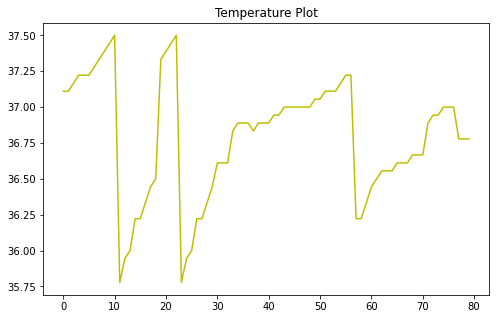

In [59]:
plot_temp(df12)

## Now Model Building

#### The person having heart risk will be labeled as 1
####  The person not having heart risk will be labeled as 0

In [81]:
## Let
def create_label(x):
    val=x["ir_level"]/x["red_level"]
    temp=x["temperature"]
    if (temp>36.5)and (temp<38.6)and val>0.99 and val<1.01:
        return 0
    else:
        return 1
df1.apply(lambda x : create_label(x),axis=1).value_counts()

0    45
1    34
dtype: int64

In [82]:
## Let's cocat all dataframes

In [85]:
df=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12])

In [89]:
df["Risk"]=df.apply(lambda x: create_label(x),axis=1)

In [98]:
df.isnull().sum()

ir_level       0
red_level      0
temperature    1
Risk           0
dtype: int64

In [99]:
df["temperature"].fillna(df["temperature"].mean(),inplace=True)

In [100]:
df.Risk.value_counts()

0    757
1    190
Name: Risk, dtype: int64

In [101]:
df.head()

,ir_level,red_level,temperature,Risk
0,40164.0,39722.0,36.777778,1
1,40172.0,39728.0,36.777778,1
2,40156.0,39724.0,36.833333,1
3,40166.0,39724.0,36.833333,1
4,40153.0,39729.0,36.888889,1


In [102]:
##creating Dependent and Independent variable
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [103]:
## Now let's split our dataset into train and testing datasets

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [105]:
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.3,stratify=y)

In [116]:
### Let's Scale our dataset
sc=StandardScaler()
train_X=sc.fit_transform(train_X)
test_X=sc.transform(test_X)

### Now Let's Apply Logistic Regression

In [117]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [118]:
lr.fit(train_X,train_y)

LogisticRegression()

In [119]:
## Now test it on testing datasets

In [120]:
pred_y=lr.predict(test_X)

In [121]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [125]:
def check_scores(test_y,pred_y):
    print(confusion_matrix(test_y,pred_y))
    print(classification_report(test_y,pred_y))
    print(accuracy_score(test_y,pred_y))

In [126]:
check_scores(test_y,pred_y)

[[221   7]
 [ 24  33]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       228
           1       0.82      0.58      0.68        57

    accuracy                           0.89       285
   macro avg       0.86      0.77      0.81       285
weighted avg       0.89      0.89      0.88       285

0.8912280701754386


### Now let's Apply SVM with linear kernel

In [128]:
from sklearn.svm import SVC

In [130]:
svc_linear=SVC(kernel="linear")
svc_linear.fit(train_X,train_y)

SVC(kernel='linear')

In [131]:
pred_y=svc_linear.predict(test_X)

In [132]:
check_scores(test_y,pred_y)

[[228   0]
 [ 25  32]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       228
           1       1.00      0.56      0.72        57

    accuracy                           0.91       285
   macro avg       0.95      0.78      0.83       285
weighted avg       0.92      0.91      0.90       285

0.9122807017543859


#### Let's apply svm with rbf kernel

In [135]:
svc_rbf=SVC(kernel="rbf")
svc_rbf.fit(train_X,train_y)

SVC()

In [137]:
pred_y=svc_rbf.predict(test_X)

In [138]:
check_scores(test_y,pred_y)

[[227   1]
 [ 10  47]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       228
           1       0.98      0.82      0.90        57

    accuracy                           0.96       285
   macro avg       0.97      0.91      0.94       285
weighted avg       0.96      0.96      0.96       285

0.9614035087719298


In [ ]:
print("The accuracy score with SVM with rbf kernel is")

In [139]:
print("The accuracy Score is 96% with SVM model with rbf kernel")

The accuracy Score is 96% with SVM model with rbf kernel
